In [19]:
import matplotlib 
import pandas as pd

In [2]:
import os
os.getcwd()

'/Users/2010y/freelist'

In [3]:
df=pd.read_feather('program_l.feather')

In [24]:
df.shape

(55490, 10)

In [6]:
df['timezone']=df['date'].astype('str')
df['timezone']=df['timezone'].str.extract(r'(\s\D\d{4})')

<AxesSubplot:ylabel='timezone'>

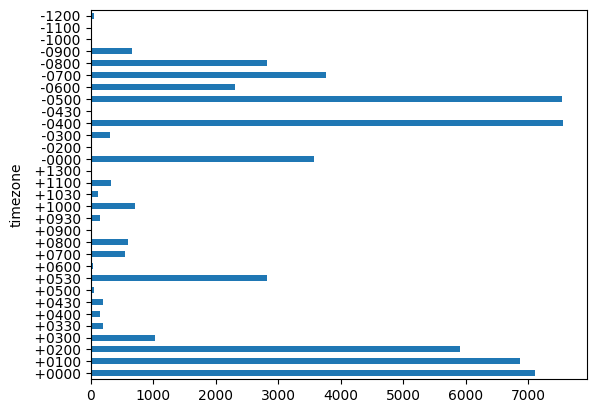

In [21]:
df.groupby(['timezone'])['body'].count().plot.barh()

In [30]:
df.groupby(['timezone'])['body'].count().sort_values(ascending=False)[0:10]

timezone
 -0400    7552
 -0500    7531
 +0000    7108
 +0100    6859
 +0200    5903
 -0700    3767
 -0000    3568
 +0530    2828
 -0800    2819
 -0600    2312
Name: body, dtype: int64

-0400: 7552 (Argentina, Brazil)
-0500: 7532 (Eastern Time Zone USA, Colombia, Peru)
+0000: 7108 (UK)
+0100: 6859 (Western Europe)
+0200: 5903 (Eastern Europe, Egypt, Libya, South Africa)
-0700: 3767 (Mountain Time Zone USA)
-0000: 3568 (UK?)
+0530: 2828 (India)
-0800: 2819 (Pacific Time Zone USA)
-0600: 2312 (Central Time Zone USA)

In [40]:
df['email']=df['from'].str.extract(r'(\<.*\>)')
df['email']=df['email'].str.lstrip('<')
df['email']=df['email'].str.rstrip('>')

In [44]:
df.groupby(['email'])['body'].count().sort_values(ascending=False)

email
sonfire11@xxxxxxxxx         2145
soronel.haetir@xxxxxxxxx    1965
james.homme@xxxxxxxxxxxx    1520
pranav.lal@xxxxxxxxx        1425
tyler@xxxxxxxxxxxxx         1308
                            ... 
gagabim@xxxxxxxxx              1
sashaikh@xxxxxxxxxxxxx         1
sbahram@xxxxxxxxx              1
sbillah@xxxxxxx                1
zz78@xxxxxxxxxxxx              1
Name: body, Length: 871, dtype: int64